In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from pandas.plotting import table 
import datetime as dt 
import os

In [2]:
df = pd.ExcelFile('C:\\Users\\ACER\Documents\\python projects\\KPMG\\KPMG.xlsx')
df_t = pd.read_excel(df, 'Transactions')
df_n = pd.read_excel(df, 'NewCustomerList')
df_cd = pd.read_excel(df, 'CustomerDemographic')
df_ca = pd.read_excel(df, 'CustomerAddress')

In [3]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               19445 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19803 n

In [4]:
# Filling missing values
df_t['online_order'].fillna(0, inplace=True)

for col in ['brand', 'product_line', 'product_class', 'product_size']:
    if col in df_t.columns:
        df_t[col].fillna(0, inplace=True)

# Convert columns to numeric and fill missing values with mean
for col in ['standard_cost', 'product_first_sold_date']:
    if col in df_t.columns:
        df_t[col] = pd.to_numeric(df_t[col], errors='coerce')
        df_t[col].fillna(df_t[col].mean(), inplace=True)

In [5]:
df_old = pd.merge(pd.merge(df_t, df_cd), df_ca)
df_old.sort_values(by='customer_id', ascending=True, inplace =True)
df_old.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,wealth_segment,deceased_indicator,default,owns_car,tenure,address,postcode,state,country,property_valuation
605,14486,23,1,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,...,Mass Customer,N,"""'",Yes,11.0,060 Morning Avenue,2016,New South Wales,Australia,10
608,16423,9,1,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,...,Mass Customer,N,"""'",Yes,11.0,060 Morning Avenue,2016,New South Wales,Australia,10
607,15663,32,1,2017-06-04,1.0,Approved,Giant Bicycles,Standard,medium,medium,...,Mass Customer,N,"""'",Yes,11.0,060 Morning Avenue,2016,New South Wales,Australia,10
606,14931,31,1,2017-12-14,1.0,Approved,Giant Bicycles,Standard,medium,medium,...,Mass Customer,N,"""'",Yes,11.0,060 Morning Avenue,2016,New South Wales,Australia,10
599,94,86,1,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,...,Mass Customer,N,"""'",Yes,11.0,060 Morning Avenue,2016,New South Wales,Australia,10


In [6]:
df_old[['list_price', 'standard_cost', 'profit','past_3_years_bike_related_purchases']].describe()

,list_price,standard_cost,profit,past_3_years_bike_related_purchases
count,19414.000000,19968.000000,19968.000000,19968.000000
mean,1107.548886,555.574606,536.660386,48.757412
std,582.598272,399.899321,494.730164,28.611359
min,12.010000,7.210000,0.000000,0.000000
25%,575.270000,230.090000,129.010000,24.000000
50%,1163.890000,513.850000,437.460000,48.000000
75%,1635.300000,778.690000,827.160000,73.000000
max,2091.470000,1759.850000,1702.550000,99.000000


In [7]:
# Group gender to same format
df_old['gender'] = df_old['gender'].replace({'F': 'Female', 'Femal': 'Female', 'M': 'Male', 'U': 'Non-defined'})
df_old['gender'].value_counts()

gender
Female         9997
Male           9516
Non-defined     455
Name: count, dtype: int64

In [8]:
# Group state to same format
df_old['state'] = df_old['state'].replace({'New South Wales': 'NSW'})
df_old['state'].value_counts()

state
NSW         10685
VIC          4541
QLD          4262
Victoria      480
Name: count, dtype: int64

In [9]:
df_old = df_old[df_old['product_class'] != 0]
df_old['product_class'].value_counts()

product_class
medium    13802
high       3012
low        2959
Name: count, dtype: int64

In [10]:
df_old['DOB']

605      1953-10-12 00:00:00
608      1953-10-12 00:00:00
607      1953-10-12 00:00:00
606      1953-10-12 00:00:00
599      1953-10-12 00:00:00
                ...         
11295    1967-07-21 00:00:00
11294    1967-07-21 00:00:00
11298    1967-07-21 00:00:00
11297    1967-07-21 00:00:00
11299    1967-07-21 00:00:00
Name: DOB, Length: 19773, dtype: object

In [11]:
df_old['state'] = df_old['state']. replace('Victoria', 'VIC')
df_old['DOB'] = pd.to_datetime(df_old['DOB'], format='%Y.%m.%d', errors='coerce')
current_year = 2024
df_old['Age'] = df_old['DOB'].apply(lambda x: current_year - x.year if pd.notnull(x) else None)
df_old['Age']

605      71.0
608      71.0
607      71.0
606      71.0
599      71.0
         ... 
11295    57.0
11294    57.0
11298    57.0
11297    57.0
11299    57.0
Name: Age, Length: 19773, dtype: float64

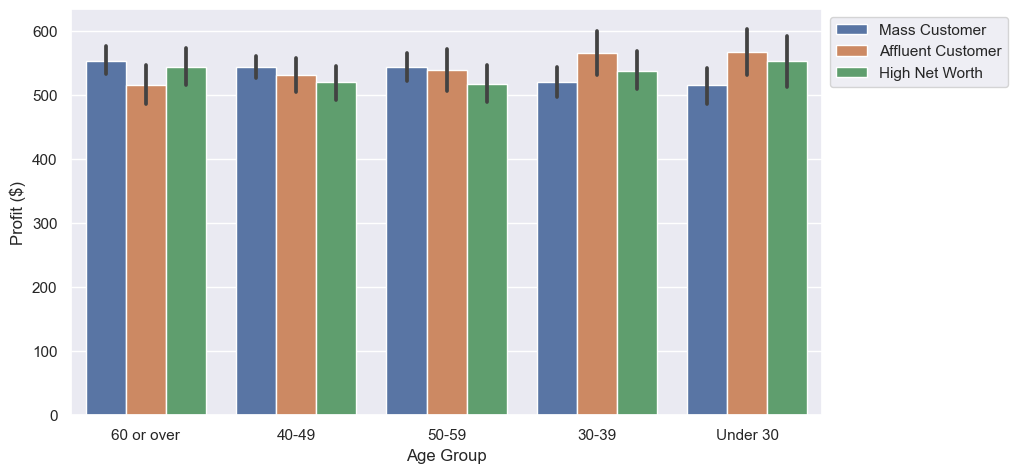

In [12]:
# Contribution of age group and wealth segment to profit

df_old['age_group'] = np.where(df_old['Age'] < 30, 'Under 30',
                        np.where(df_old['Age'] < 40, '30-39',
                        np.where(df_old['Age'] < 50, '40-49',
                        np.where(df_old['Age'] < 60, '50-59', '60 or over'))))
sns.set(style="darkgrid", rc={'figure.figsize':(9.7,5.27)})
chart1 = sns.barplot(data = df_old, x = 'age_group', y = 'profit', hue = 'wealth_segment')
plt.legend(loc='upper right')
chart1.legend(bbox_to_anchor= ( 1, 1))
chart1.set_xlabel('Age Group')
chart1.set_ylabel('Profit ($)')
chart1.figure.savefig("chart1", bbox_inches = 'tight')

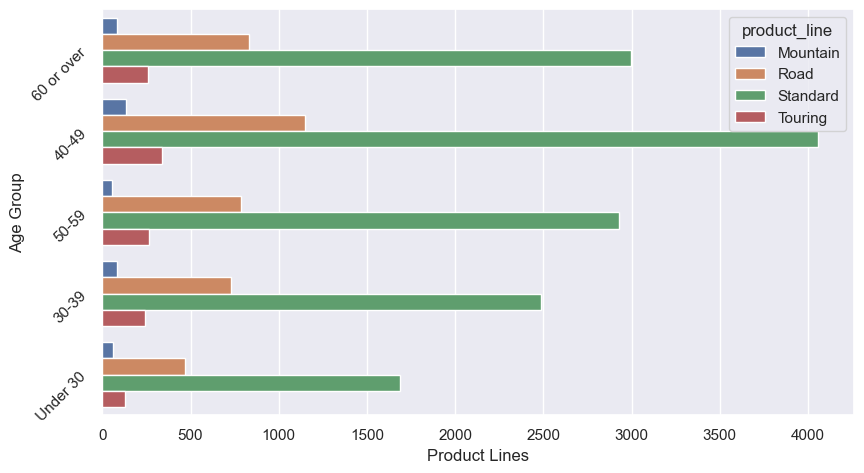

In [13]:
# Product types ordered by different age groups
chart2 = sns.countplot(data = df_old, y = 'age_group', hue = 'product_line')
chart2.set_ylabel('Age Group')
chart2.set_xlabel('Product Lines')
chart2.set_yticklabels(chart2.get_yticklabels(), rotation=45, ha='right')
chart2.figure.savefig("chart2")

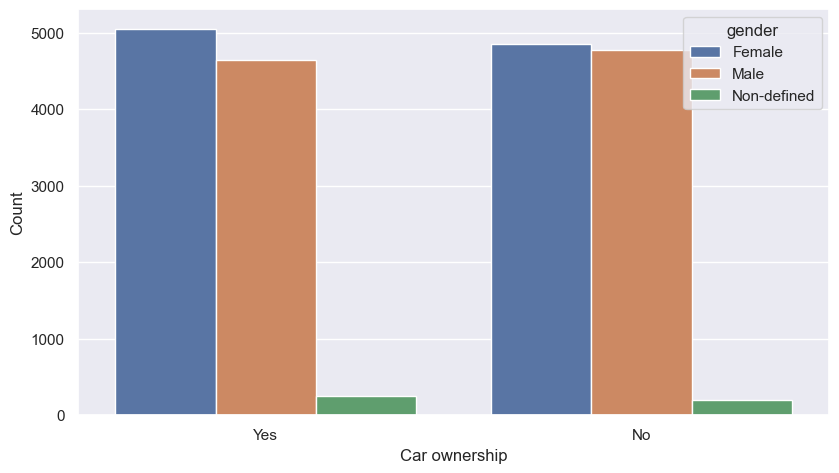

In [14]:
sns.set(style="darkgrid", rc={'figure.figsize':(9.7,5.27)})
chart3= sns.countplot(data = df_old, x = 'owns_car', hue = 'gender')
chart3.set_ylabel('Count')
chart3.set_xlabel('Car ownership')
chart3.figure.savefig("chart3")

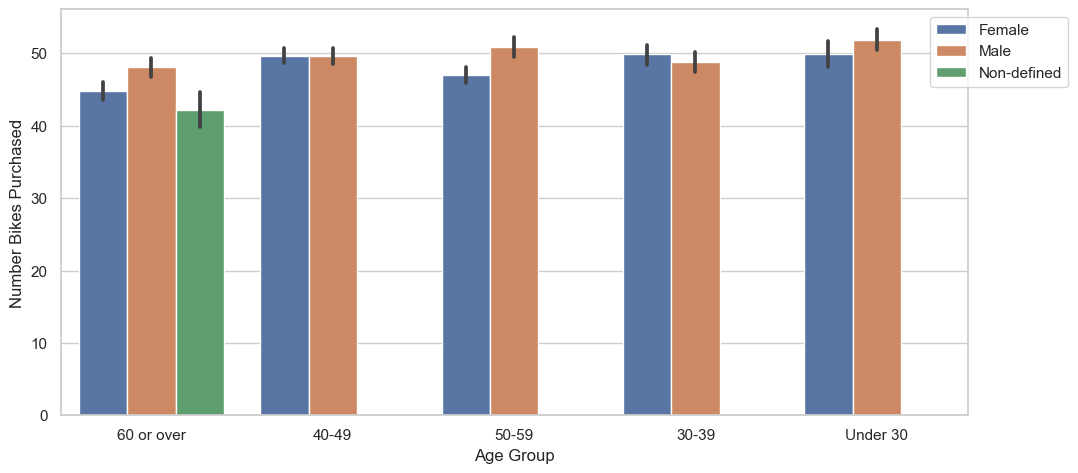

In [15]:
# Past 3 years of bike purchases by age groups and gender

sns.set(style="whitegrid", rc={'figure.figsize':(11.7,5.27)})

chart4= sns.barplot(data = df_old, x = 'age_group', y = 'past_3_years_bike_related_purchases', hue= 'gender')
plt.legend(loc='upper right')
chart4.legend(bbox_to_anchor= (0.95,1))
chart4.set_ylabel('Number Bikes Purchased')
chart4.set_xlabel('Age Group')
chart4.figure.savefig("chart4")

# RFM Analysis


In [16]:
now = dt.datetime(2017, 12, 31)

rfm_df = df_old.groupby('customer_id').agg({'transaction_date': lambda x: (now - x.max()).days,
                                           'transaction_id': lambda x: len(x.unique()),
                                            'list_price': lambda x: x.sum()}).reset_index()
rfm_df.rename(columns = {'transaction_date': 'recency', 'transaction_id': 'frequency', 'list_price': 'monetary'}, inplace=True)
rfm_df.head()

,customer_id,recency,frequency,monetary
0,1,8,11,11734.07
1,2,129,3,4170.51
2,4,196,2,2719.97
3,5,17,6,8055.76
4,6,65,5,6432.07


NameError: name 'chart5' is not defined

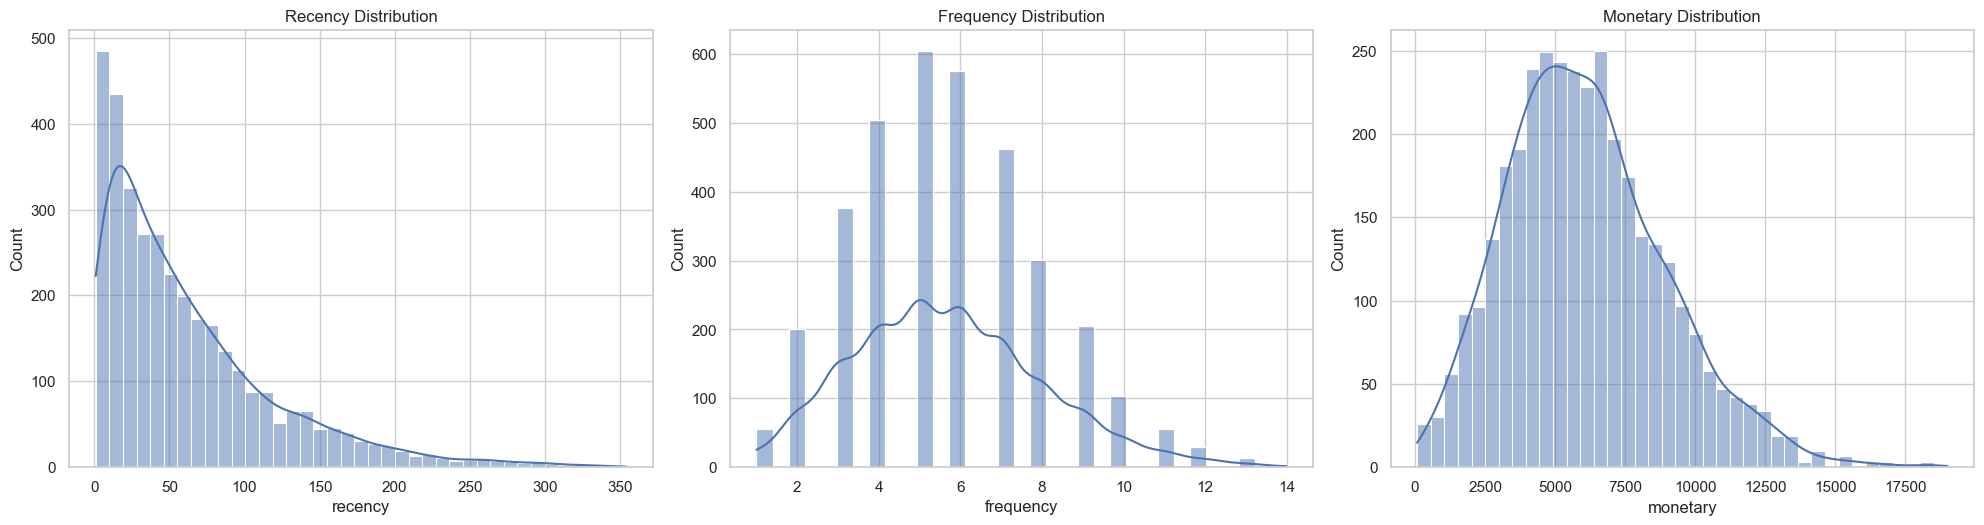

In [17]:
# RFM distribution

plt.figure(figsize=(20, 15))

# Plot Recency Distribution
plt.subplot(3, 3, 1)
sns.histplot(rfm_df['recency'], kde=True)
plt.title('Recency Distribution')

# Plot Frequency Distribution
plt.subplot(3, 3, 2)
sns.histplot(rfm_df['frequency'], kde=True)
plt.title('Frequency Distribution')

# Plot Monetary Distribution
plt.subplot(3, 3, 3)
sns.histplot(rfm_df['monetary'], kde=True)
plt.title('Monetary Distribution')

plt.tight_layout()
chart5.figure.savefig("chart5", bbox_inches = 'tight')
plt.show()

In [18]:
# Customer segmentation
rfm_df['R_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['monetary'].rank(ascending=True)

# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['M_rank']/rfm_df['M_rank'].max())*100

rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)

rfm_df.head()

,customer_id,recency,frequency,monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,1,8,11,11734.07,90.089440,97.950115,95.958727
1,2,129,3,4170.51,13.199654,12.729358,26.368587
2,4,196,2,2719.97,3.967109,4.458142,10.260820
3,5,17,6,8055.76,77.437969,58.199541,77.156778
4,6,65,5,6432.07,36.454126,41.284404,58.211522


In [19]:
rfm_df['RFM_score'] = 0.15*rfm_df['R_rank_norm']+0.28 * \
    rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df['RFM_score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['RFM_score']].head()

,RFM_score
0,4.78
1,1.03
2,0.38
3,3.59
4,2.51


In [20]:
rfm_df["customer_segment"] = np.where(rfm_df['RFM_score'] >
                                      4.5, "Top Customer",
                                      (np.where(
                                        rfm_df['RFM_score'] > 4,
                                        "High value Customer",
                                        (np.where(
    rfm_df['RFM_score'] > 3,
                             "Medium Value Customer",
                             np.where(rfm_df['RFM_score'] > 1.6,
                            'Low Value Customer', 'Lost Customer'))))))
rfm_df[[ 'RFM_score', 'customer_segment']].head(20)

,RFM_score,customer_segment
0,4.78,Top Customer
1,1.03,Lost Customer
2,0.38,Lost Customer
3,3.59,Medium Value Customer
4,2.51,Low Value Customer
5,0.60,Lost Customer
6,3.92,Medium Value Customer
7,2.77,Low Value Customer
8,3.28,Medium Value Customer
9,3.13,Medium Value Customer


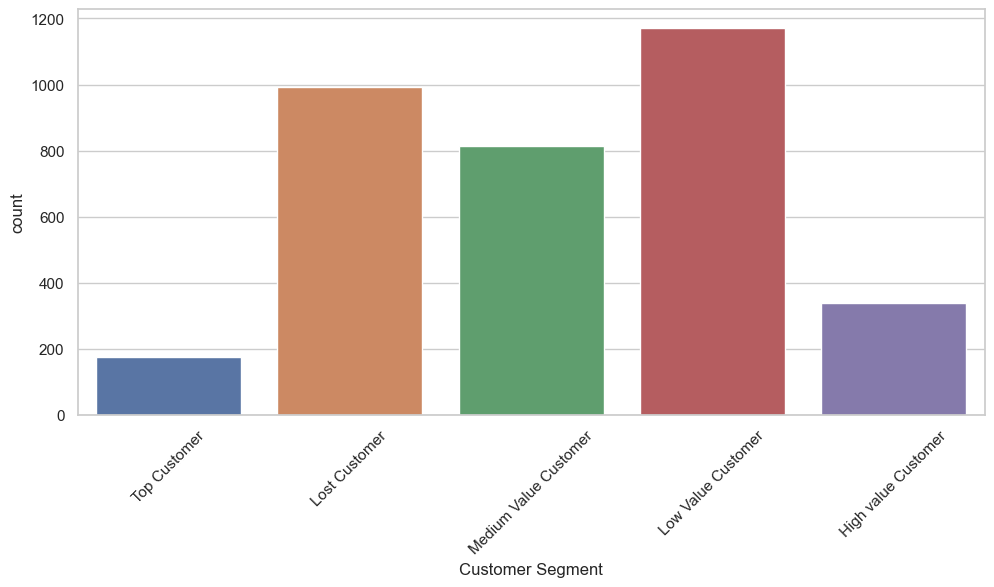

In [21]:
chart6 = sns.countplot(data = rfm_df, x = "customer_segment")
plt.xticks(rotation=45)
chart6.set_xlabel('Customer Segment')
chart6.figure.savefig("chart6", bbox_inches = 'tight')

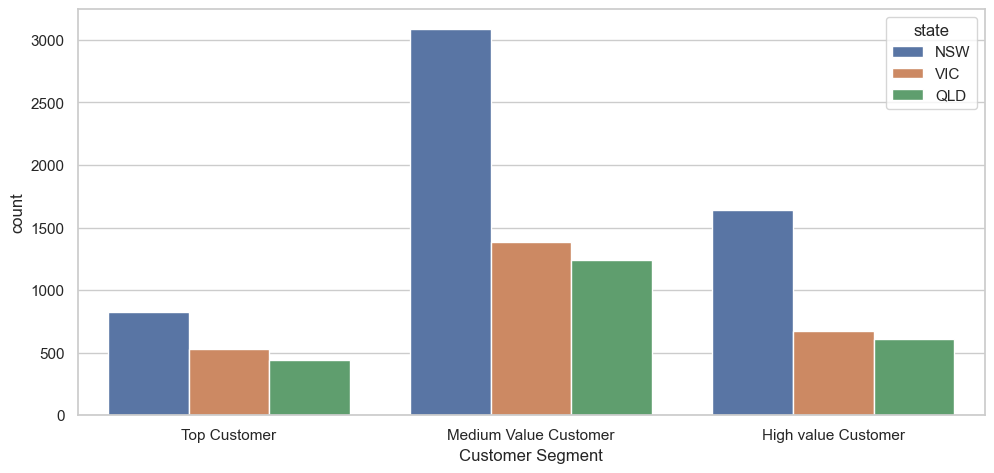

In [33]:

loyal_customer = rfm_df[rfm_df['customer_segment'].isin(['Top Customer', 'High value Customer', 'Medium Value Customer'])]
loyal_customer = loyal_customer.merge(df_old[['customer_id', 'state', 'age_group', 'wealth_segment']], on='customer_id', how='left')

chart7 = sns.countplot(data=loyal_customer, x='customer_segment', hue='state')
chart7.set_xlabel('Customer Segment')
chart7.figure.savefig("chart7", bbox_inches='tight')


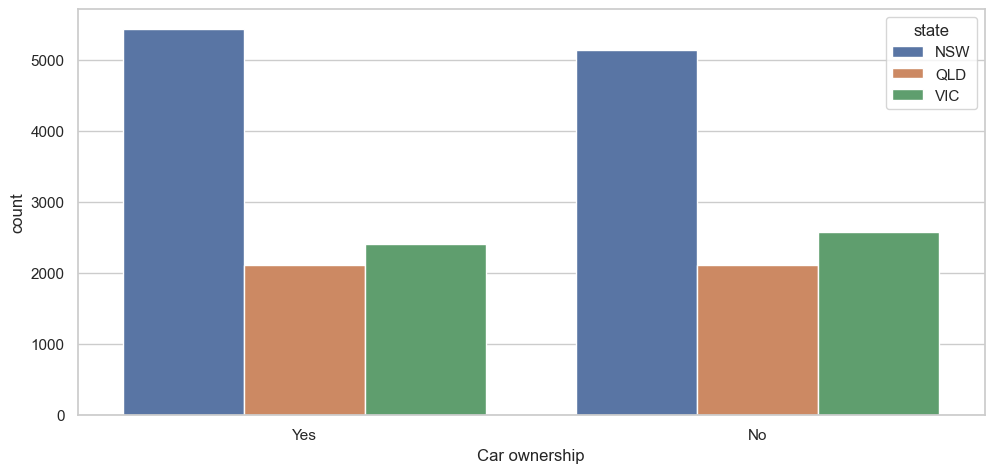

In [23]:
chart8= sns.countplot(data = loyal_customer, x = df_old['owns_car'], hue = df_old["state"] )
chart8.set_xlabel('Car ownership')
chart8.figure.savefig("chart8", bbox_inches = 'tight')

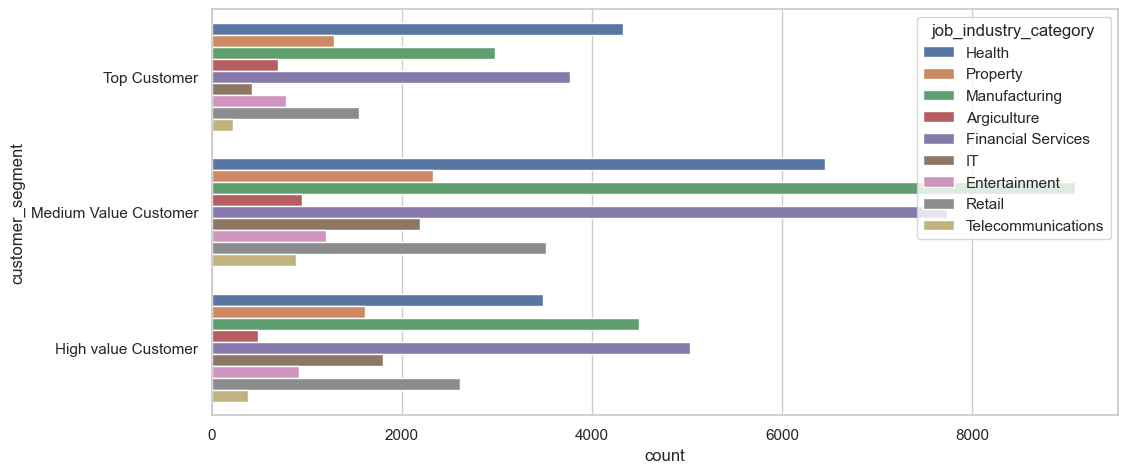

In [24]:
# Job industry

loyal_customer = loyal_customer.merge(df_old[['customer_id', 'job_industry_category']], on='customer_id', how='left')

chart9 = sns.countplot(data=loyal_customer, y='customer_segment', hue='job_industry_category')
chart9.figure.savefig("chart9", bbox_inches='tight')

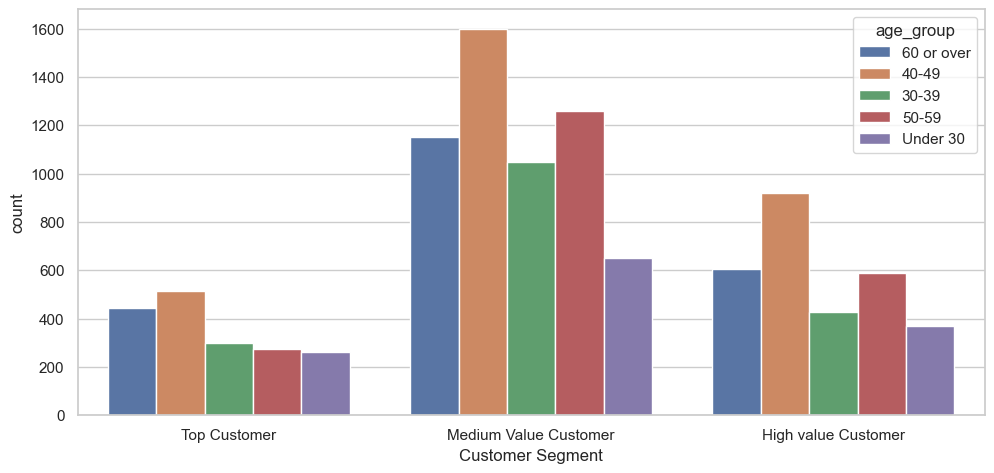

In [29]:
# Age group
chart10 = sns.countplot(data=loyal_customer, x='customer_segment', hue='age_group')
chart10.set_xlabel('Customer Segment')
chart10.figure.savefig("chart10", bbox_inches='tight')

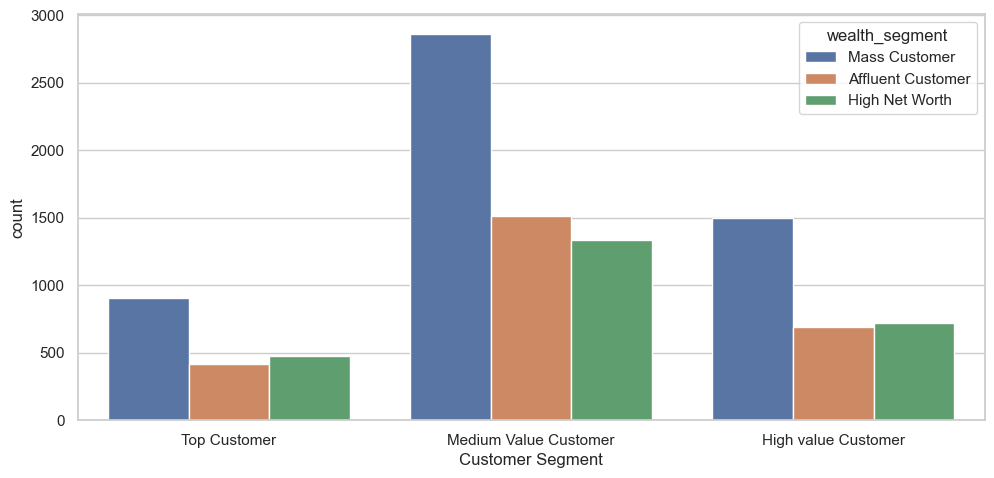

In [34]:
# Wealth segment
chart11 = sns.countplot(data = loyal_customer, x = 'customer_segment', hue = 'wealth_segment')
chart11.set_xlabel('Customer Segment')
chart11.figure.savefig("chart11", bbox_inches = 'tight')